### **Importing File**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('/content/preprocessed_election.csv')
data.head()

,Constituency_No,Year,Position,Sex,Party,Votes,Age,Candidate_Type,Constituency_Name,Constituency_Type,Vote_Share_Percentage,Margin,Margin_Percentage,Incumbent
0,1,2019,1,m,INC,82770,61.0,st,AKKALKUWA,ST,41.26,2096,1.04,True
1,1,2019,2,m,SHS,80674,51.0,st,AKKALKUWA,ST,40.21,59010,29.41,False
2,1,2019,3,m,IND,21664,44.0,st,AKKALKUWA,ST,10.80,16807,8.38,False
3,2,2019,1,m,BJP,94931,50.0,st,SHAHADA,ST,45.12,7991,3.80,False
4,2,2019,2,m,INC,86940,51.0,st,SHAHADA,ST,41.32,65927,31.34,False


### **Data Wrangling**

In [4]:
#To identify how many rows and columns our dataset has
data.shape

(11031, 14)

In [5]:
#identifying the datatype of each column
data.dtypes

,0
Constituency_No,int64
Year,int64
Position,int64
Sex,object
Party,object
Votes,int64
Age,float64
Candidate_Type,object
Constituency_Name,object
Constituency_Type,object


In [6]:
#to see the number of parties that participated
data['Party'].unique()

array(['INC', 'SHS', 'IND', 'BJP', 'VBA', 'AIMIM', 'LKSGM', 'NCP', 'BSP',
       'PHJSP', 'SWP', 'STBP', 'MNS', 'PWPI', 'RSPS', 'SP', 'CPIM', 'BVA',
       'AAAP', 'KTSTP', 'APoI', 'JSS', 'Vanchit Bahujan Aaghadi', 'BBM',
       'RPI', 'PREP', 'CPM', 'RPI(A)', 'MVA', 'IUML', 'AIMEMP', 'BREM',
       'GGP', 'LB', 'JD(S)', 'ABHS', 'SWJP', 'SS', 'ABHM', 'SJP(M)',
       'PRBP', 'CPI', 'NVAS', 'JD(U)', 'LRP', 'RSP', 'SHIVSENA', 'RPI(D)',
       'NVPP', 'MVC', 'JP', 'JD', 'PWP', 'BBMS', 'SAP', 'ICS', 'RPI(K)',
       'HJP', 'MUL', 'BRP', 'ICS(SCS)', 'DDP', 'MMS', 'RPK', 'JNP(JP)',
       'JNP', 'LKD', 'INC(I)', 'INC(U)', 'JNP(SR)', 'JNP(SC)', 'FBL',
       'SOP', 'BJS', 'NCO', 'SWA', 'BKD', 'HMS', 'PSP', 'SSP', 'JS',
       'REP', 'SOC'], dtype=object)

In [7]:
# Identify the top 5 parties based on the total votes they received in the dataset
top_5_parties_votes = data.groupby('Party')['Votes'].sum().sort_values(ascending=False).head(5)
top_5_parties_votes

,Votes
Party,
INC,103502263
BJP,57194257
SHS,51390502
NCP,40419918
IND,35204515


In [8]:
#Displays the average age of each candidate in the top 5 parties
average_age = data[data['Party'].isin(top_5_parties_votes.index)].groupby('Party')['Age'].mean()
print("Average Candidate Age by Party:\n", average_age)

Average Candidate Age by Party:
 Party
BJP    49.124315
INC    49.131227
IND    48.263589
NCP    49.689548
SHS    48.400000
Name: Age, dtype: float64


In [25]:
print(data['Candidate_Type'].unique())
#show percentage
data['Candidate_Type'].value_counts(normalize=True) * 100

['st' 'gen' 'sc']


,proportion
Candidate_Type,
gen,93.636116
sc,3.580818
st,2.783066


### **EDA**

In [10]:
fig = px.histogram(data, x='Age',nbins=10, title="Distribution of Age of Candidates", color_discrete_sequence=["#6abcb0"])
fig.update_layout(xaxis_title="Age", yaxis_title="Frequency",xaxis=dict(
        tickmode='linear',  # Ensures uniform intervals
        tick0=20,  # Starting tick
        dtick=10   # Interval between ticks
    ))
fig.show()

**Reason for using Histogram:**the distribution of a single continuous variable Age can easily be represented through this.

**Inference:**The age distribution shows a peak in the middle-age group, indicating that most candidates are likely in their 40s and 50s, with fewer young and elderly candidates. This may suggest that political participation is most common among middle-aged individuals.

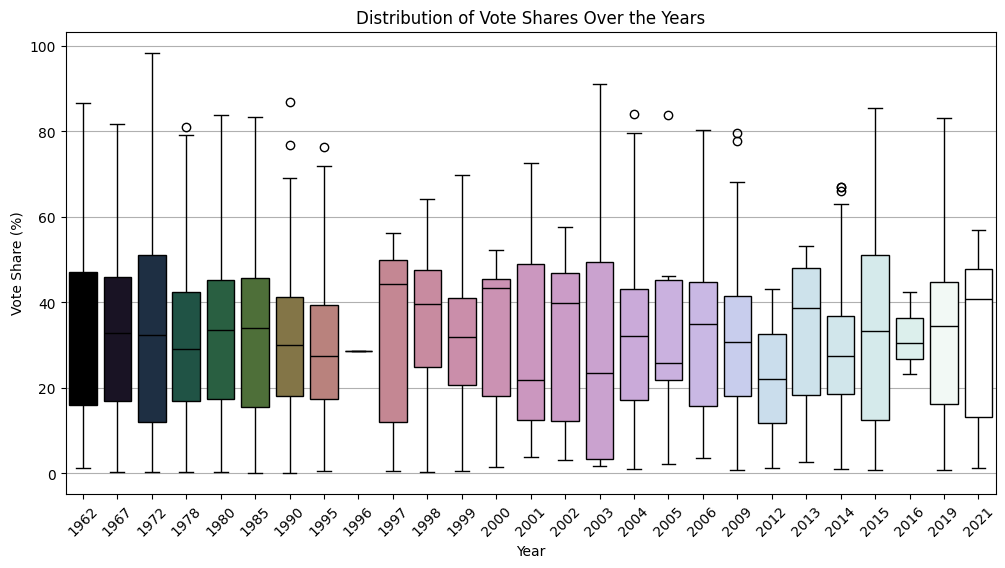

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='Year', y='Vote_Share_Percentage', palette='cubehelix',hue='Year',legend=False)
plt.title("Distribution of Vote Shares Over the Years")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Vote Share (%)")
plt.grid(axis='y')
plt.show()

**Reasons for using box plot:** We can identify the vote share patterns and trends throughout the years easily and also understand how tough the competition was by the thickness of the graph which other graphs don't offer.

**Inference:**
1. The width of the box suggests the vote share distribution over the years. If the box is long it means that there was a good competition that year and a short box suggests that the competition was very low.
2. The thin boxplot suggests that the political party's vote share in 1996 was relatively stable across different regions or constituencies. There were not significant fluctuations or outliers that would have widened the boxplot.
3. Outliers in this plot are the data points that are different from the other due to unusual trends during the political campaign or error.
4. There is no particular trend followed by the median hence we can say that the vote share keeps fluctuating every year.

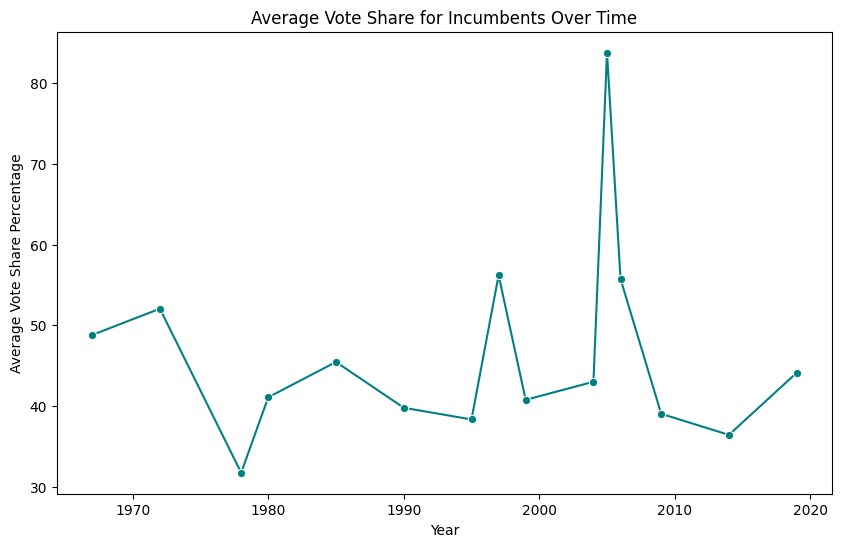

In [12]:
# Calculating the average vote share for incumbents over time
incumbent_data = data[data['Incumbent'] == True]
avg_vote_share_by_year = incumbent_data.groupby('Year')['Vote_Share_Percentage'].mean().reset_index()

# Plot: Vote Share for Incumbents Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Vote_Share_Percentage', data=avg_vote_share_by_year, marker='o', color='teal')
plt.title('Average Vote Share for Incumbents Over Time')
plt.xlabel('Year')
plt.ylabel('Average Vote Share Percentage')
plt.show()

**Reasons for choosing Line Plot:**Allows us to understand the trends over time

**Inference:**The graph suggests that incumbent support in Maharashtra’s elections has been inconsistent.The significant highs and lows imply that incumbents’ success is closely tied to their performance and public perception during each term, with no guarantee of steady support over time.

In [13]:
party_vote_share = data.groupby('Party')['Vote_Share_Percentage'].sum() #aggregating the vote share percentages for each party across all constituencies
top_10_parties = party_vote_share.nlargest(5)
fig = px.pie(values=top_10_parties, names=top_10_parties.index, title='Top 10 Parties by Vote Share Percentage')
fig.show()

**Reasons for choosing pie chart:**We can relatively compare each category and make inferences.

**Inference:**The pie chart illustrates the top 10 parties by average vote share, with INC leading at 45.2%, highlighting INC's dominant position.

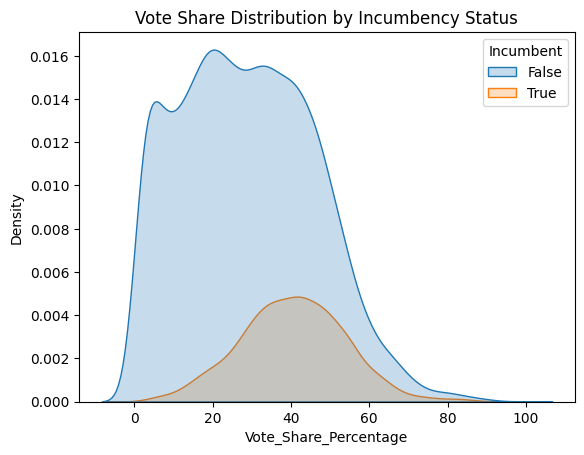

In [14]:
sns.kdeplot(data=data, x='Vote_Share_Percentage', hue='Incumbent', fill=True)
plt.title("Vote Share Distribution by Incumbency Status")
plt.show()

**Reasons for choosing KDE Graph:** Since kde plots emphasize on the density/probability, we can easily understand the liklihood of the vote shares.

**Inference:**
The plot implies that incumbency may have an impact on vote share distribution, with incumbents having a slightly more even spread across vote shares, while non-incumbents cluster more toward the lower end. This could suggest that incumbents generally perform better than new challengers in terms of vote share.
This KDE plot is helpful to understand incumbency’s influence on vote shares and whether incumbents generally secure a more favorable position in terms of voter support.

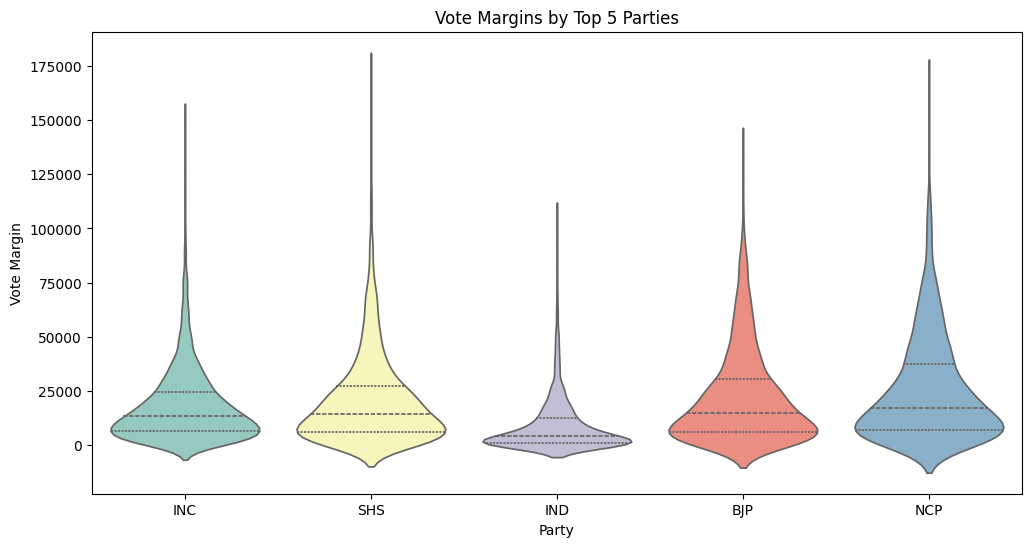

In [15]:
top_parties = data['Party'].value_counts('Votes').index[:5]
filtered_data=data[data['Party'].isin(top_parties)]#Retrieves the top 5 most frequent parties from the data.
plt.figure(figsize=(12, 6))
sns.violinplot(x='Party', y='Margin',hue='Party', data=filtered_data, palette="Set3", inner="quartile", legend=False)
plt.title('Vote Margins by Top 5 Parties')
plt.xlabel('Party')
plt.ylabel('Vote Margin')
plt.xticks(rotation=0)
plt.show()

**Reasons for using violin plot :** Allows us to see both the spread and central tendency for each party in a single visualization.

**Inference:**
1. INC and SHS: These parties have a wider range of vote margins, with some instances of very high margins. The median for SHS seems to be slightly higher than that of INC.
2. IND: This party has a narrower range of vote margins, with a lower median compared to the other parties.
3. BJP and NCP: Both these parties have a wider range of vote margins, with the median for BJP being slightly higher than that of NCP.

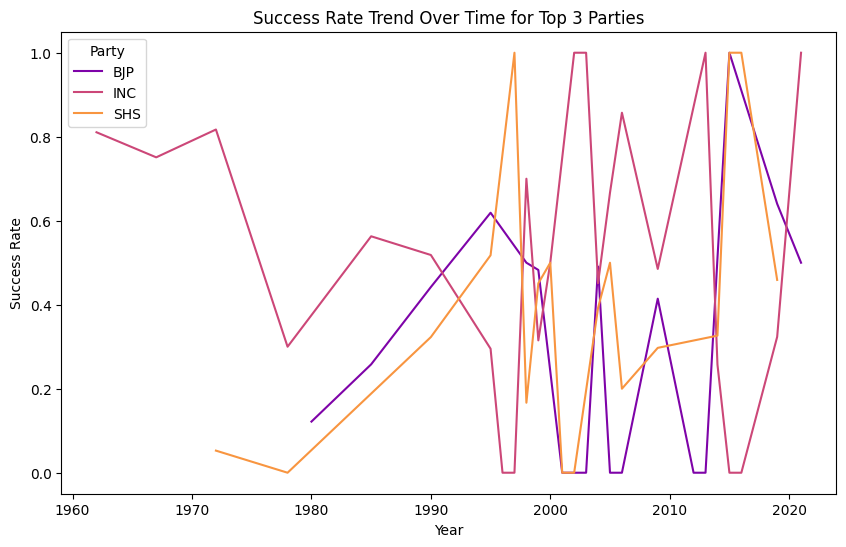

In [16]:
# Making a new dataset with candidates who have secured 1st position
winners = data[data['Position'] == 1]
# counts the number of times each party has won, displays top 3
top_3_parties_by_wins = winners['Party'].value_counts().head(3)
# Filter the success rate data for only the top 3 parties
success_rate = data.groupby(['Party', 'Year'])['Position'].apply(lambda x: (x == 1).sum() / len(x)).reset_index() #total number of 1st postion/total number of party coounts
success_rate.columns = ['Party', 'Year', 'Success_Rate']
success_rate_top_3_parties = success_rate[success_rate['Party'].isin(top_3_parties_by_wins.index)]
# Plotting the success rate trend over time for the top 3 parties
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Success_Rate', hue='Party', data=success_rate_top_3_parties, palette='plasma')
plt.title('Success Rate Trend Over Time for Top 3 Parties')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.legend(title='Party')
plt.show()

**Reasons for choosing Line plot:** Allows us to make comparisions over time easily.

**Inference:**
1.   BJP: The BJP's success rate has been on a decline since the early 2000s. It experienced a significant dip around 2005 and has been fluctuating since then.
2.   INC: The INC also shows a declining trend, with a steeper drop around the early 2010s. It has been relatively stable since then.
3. SHS: The SHS exhibits the most volatile trend, with sharp ups and downs. It had a period of high success in the early 2000s but has been declining since then.




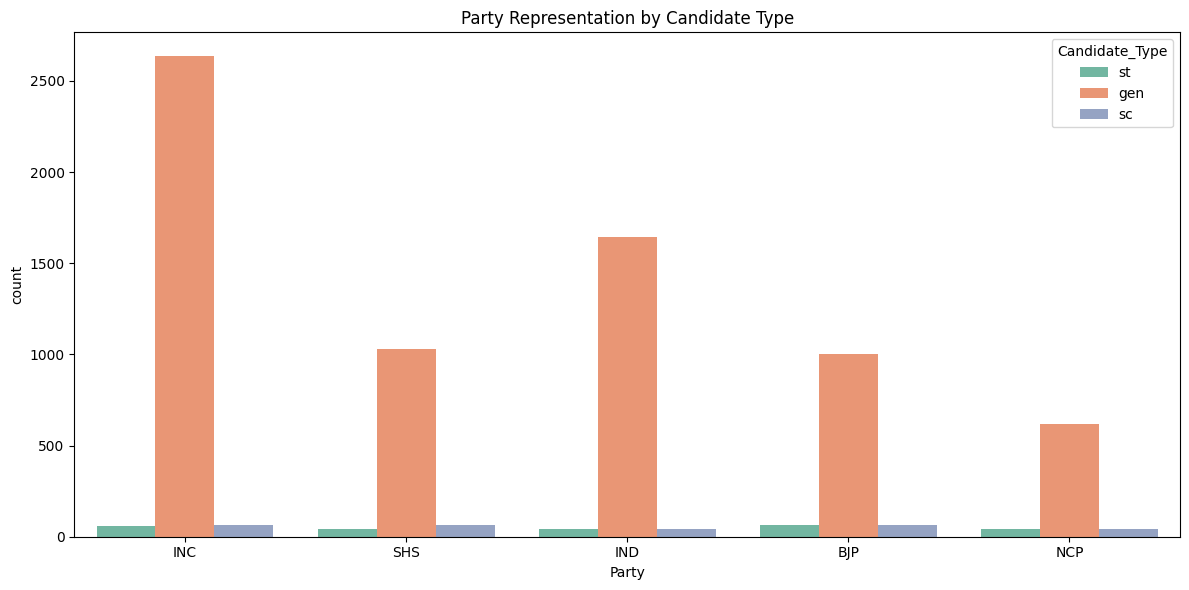

In [17]:
top_parties = data['Party'].value_counts('Votes').index[:5]
filtered_data=data[data['Party'].isin(top_parties)]

plt.figure(figsize=(12, 6))
sns.countplot(x='Party', hue='Candidate_Type', data=filtered_data, palette="Set2")
plt.title('Party Representation by Candidate Type')
plt.tight_layout()
plt.show()

**Reasons for choosing Count Plot:** In this graph comparision of all the parties and the candidate type is made easier as the height of the bars allow us to make a good analysis and helps us to quickly spot any imbalances.

**Inference:**
This graph illustrates that the majority of candidates from each party in this dataset are likely of the general category.

<ipython-input-18-b44317d84cf9>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




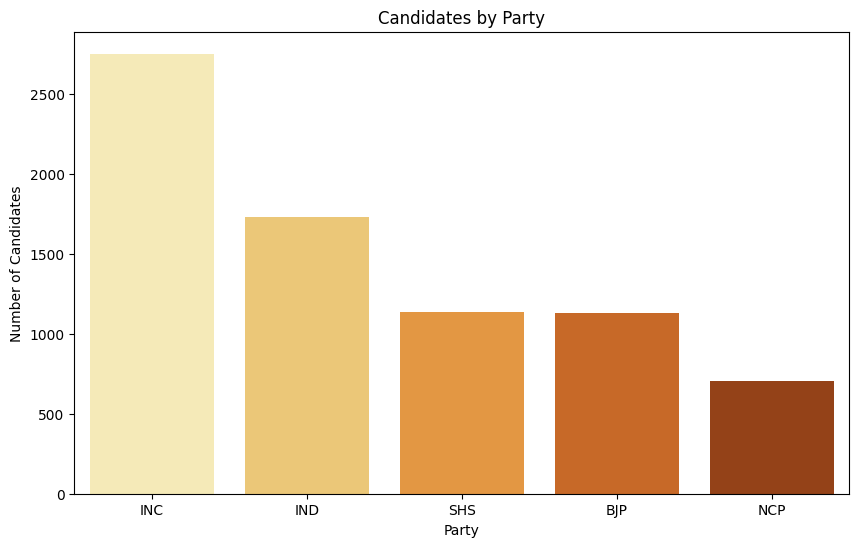

In [18]:
top_parties = data['Party'].value_counts('Votes').index[:5]
filtered_data=data[data['Party'].isin(top_parties)]
plt.figure(figsize=(10, 6))
#colour of bars should be yellow
sns.countplot(data=filtered_data , x='Party', order=filtered_data['Party'].value_counts().index, palette='YlOrBr')
plt.title('Candidates by Party')
plt.xlabel('Party')
plt.ylabel('Number of Candidates')
plt.show()

**Reason for using bar plot:** Will provied a clear and simple visual representaion of which party has the most candidates.

**Inference:**The bar chart shows the number of candidates by party. The INC has the most candidates, followed by IND, SHS, BJP, and NCP.

### **Extra Plots**

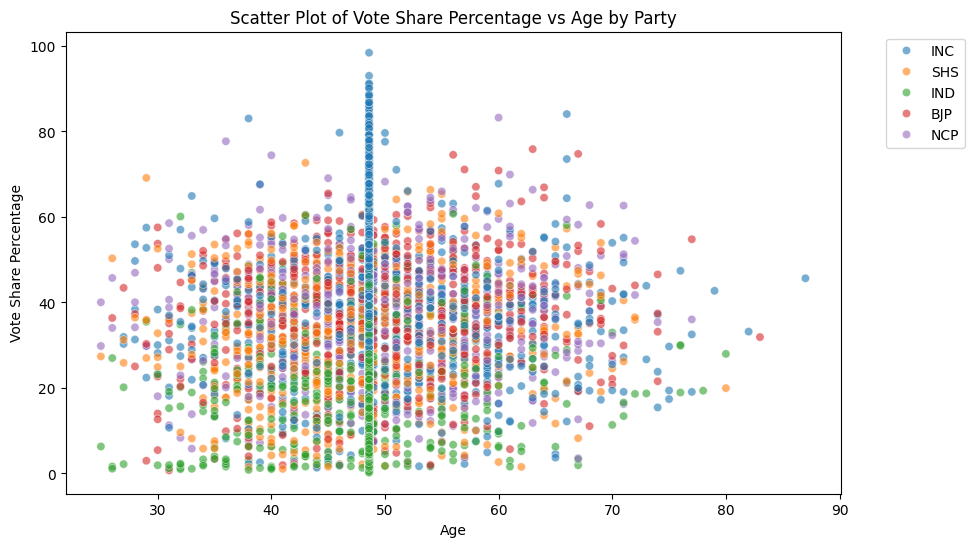

In [19]:
top_parties = data['Party'].value_counts('Votes').index[:5]
filtered_data=data[data['Party'].isin(top_parties)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Age', y='Vote_Share_Percentage', hue='Party', alpha=0.6)
plt.title('Scatter Plot of Vote Share Percentage vs Age by Party')
plt.xlabel('Age')
plt.ylabel('Vote Share Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Reasons for choosing scatter plot:** the clustering of points will give us a clear idea of which party is popular and will also allow us to point out outliers if any.

**Inference:** There is no clear trend in the data, but some parties, like the INC, seem to have a higher vote share percentage among voters who belong in to the 40-50 age group.

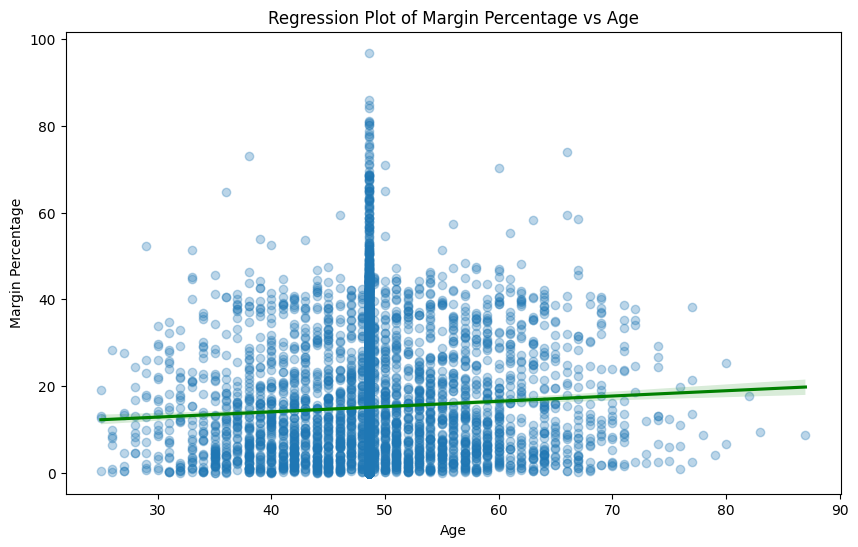

In [20]:
top_parties = data['Party'].value_counts('Votes').index[:5]
filtered_data = data[data['Party'].isin(top_parties)]
plt.figure(figsize=(10, 6))
# Add color to the regression line using line_kws
sns.regplot(data=filtered_data, x='Age', y='Margin_Percentage', scatter_kws={'alpha': 0.3}, line_kws={'color': 'green'})
plt.title('Regression Plot of Margin Percentage vs Age')
plt.xlabel('Age')
plt.ylabel('Margin Percentage')
plt.show()

**Reason for using Regression Plot:** The relationship between the two variables can be better understood using regression plot.

**Inference:**The regression plot shows a weak negative correlation between margin percentage and age. This means that as age increases, margin percentage tends to decrease slightly. However, the relationship is not very strong, and there is a lot of variability in the data.


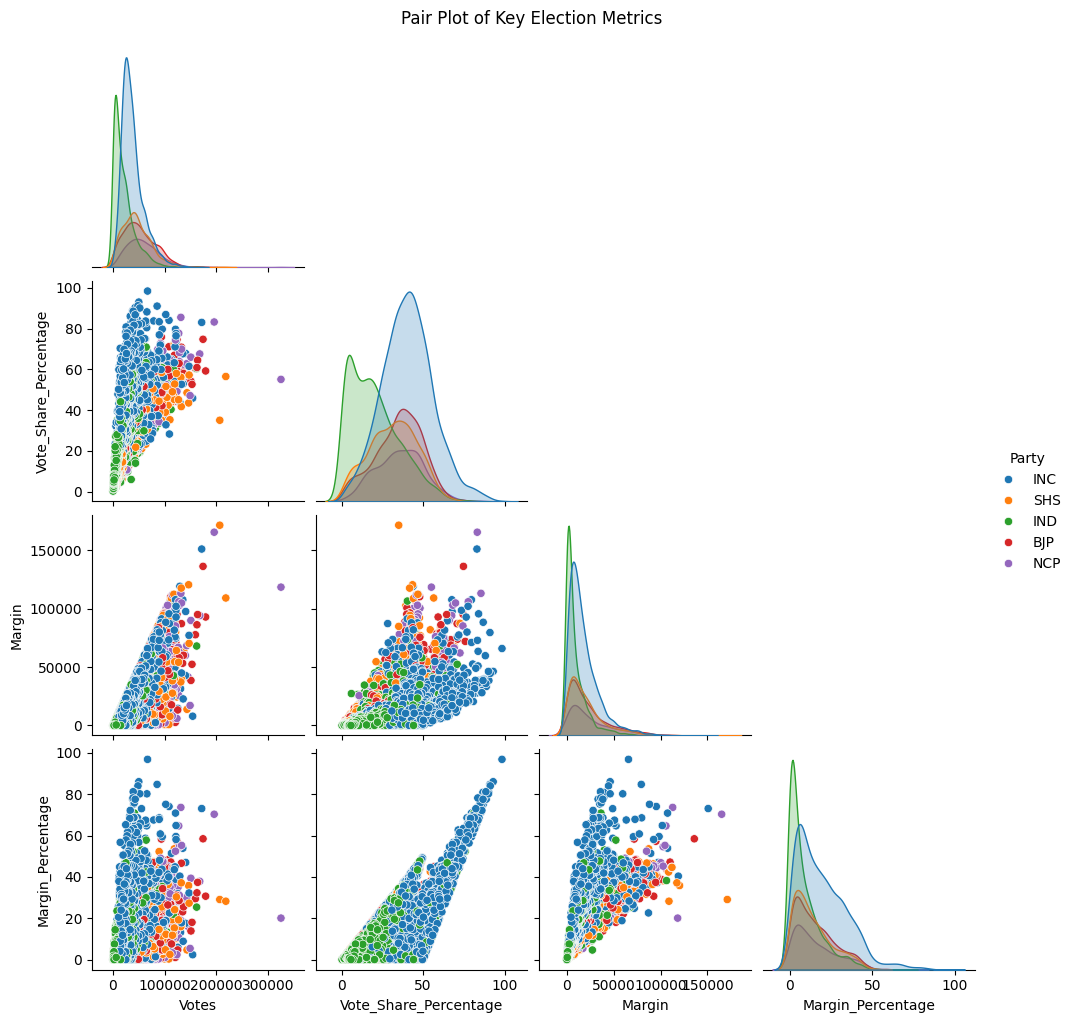

In [21]:
#Pair Plot: Relationships among Votes, Vote_Share_Percentage, Margin, Margin_Percentage
top_parties = data['Party'].value_counts('Votes').index[:5]
filtered_data=data[data['Party'].isin(top_parties)]
sns.pairplot(filtered_data, vars=['Votes', 'Vote_Share_Percentage', 'Margin', 'Margin_Percentage'], hue='Party', corner=True)
plt.suptitle('Pair Plot of Key Election Metrics', y=1.02)
plt.show()

**Reason for using pair plot:** Since it provides scatter plot between different variables you can identify patterens more efficeintly.

**Inference:**
- There is a positive correlation between votes and vote share percentage, margin, and margin percentage. This means that as the number of votes increases, so do the other metrics.

- There is a positive correlation between vote share percentage and margin and margin percentage. This means that as the vote share percentage increases, so do the other metrics.

- There is a positive correlation between margin and margin percentage. This means that as the margin increases, so does the margin percentage.

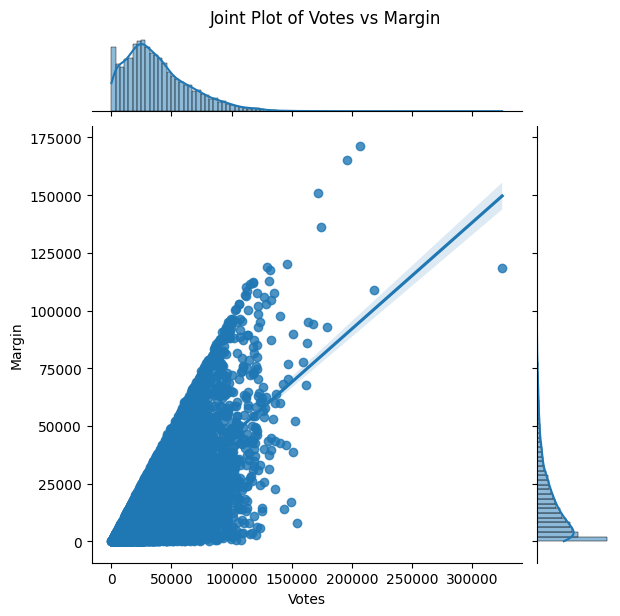

In [22]:
top_parties = data['Party'].value_counts('Votes').index[:5]
filtered_data = data[data['Party'].isin(top_parties)]
sns.jointplot(data=filtered_data,x='Votes',y='Margin',kind='reg',)
plt.suptitle('Joint Plot of Votes vs Margin', y=1.02)
plt.show()

**Reason to use joint plot: **To understand how one variable would affect the other we use joint plot.

**Inference:**The plot shows that the distribution of both votes and margin is right-skewed, meaning that most candidates have a lower number of votes and a smaller margin of victory, while a few candidates have a very high number of votes and a larger margin of victory.

# **Conclusion:**
Based on the analysis of the provided graphs, it appears that the Indian National Congress (INC) has historically been more successful in securing a higher average vote share and a larger margin of victory compared to other parties.
